<a href="https://colab.research.google.com/github/dnevo/ImageProcessing/blob/main/ImageProcessingRecitation_08_BinaryImages_Skeletonized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import requests
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
import PIL

In [ ]:
GITHUB_PATH = 'https://raw.githubusercontent.com/dnevo/ImageProcessing/main/images/'

def read_file(fname:str, file_path:str=GITHUB_PATH) -> np.ndarray:
    '''
    Accept an image file name (defaulty located in GitHub) and return the image
    in a numpy array.

    Args:
        fname: the file name
        file_path: the file path.. Default value is Doron's Github repo.

    Returns:
        the image converted into a Numpy array.
    '''
    file_path = os.path.join(file_path, fname)
    response = requests.get(file_path)
    fp = BytesIO(response.content)

    img_pil = PIL.Image.open(fp)
    return np.array(img_pil, dtype='int16')

In [ ]:
def plot_images(img1:np.array, img2:np.array):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
    axes[0].imshow(img1,  cmap='gray')
    axes[1].imshow(img2,  cmap='gray')

# 8. Binary Skeletonize Images

##8.1 Skeleton - Medial Axis Transform (MAT)

- Last time: Tag Connected Components to locate objects.
- Object recognition task - ex. face recognition
- Represent an object through a set of features.
- A skeleton is a feature that provides a compact representation of an object.

the medial axis of a subset $S$ which is bounded by planar curve $C$ is the locus of the centers of circles that are tangent to curve $C$ in two or more points, where all such circles are contained in $S$.

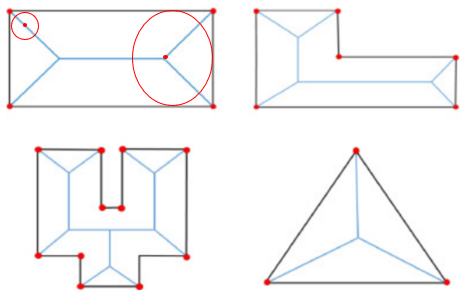

###**MAT using built-in functions:**

In [ ]:
from skimage.morphology import medial_axis, skeletonize
from skimage import data
from skimage.util import invert

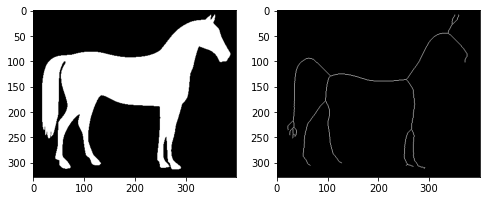

In [ ]:
image = invert(data.horse())
skeleton = medial_axis(image)
plot_images(image, skeleton)

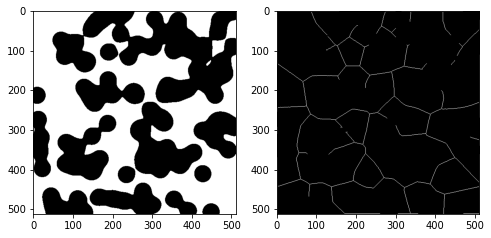

In [ ]:
image = invert(data.binary_blobs())
skeleton = medial_axis(image)
plot_images(image, skeleton)

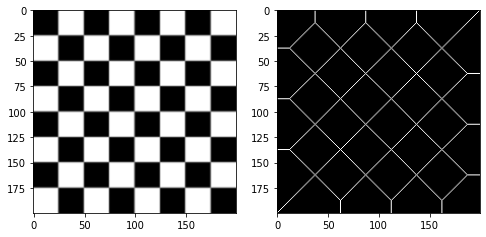

In [ ]:
image = invert(data.checkerboard())
skeleton = medial_axis(image)
plot_images(image, skeleton)

###**Skeletonize algorithm**

1. prepare a distance matrix (we use 4-connected neighborhood)
2. mark skeleton pixels - a pixel is a skeleton pixel if it is greater or equal to its 4 neighbors.

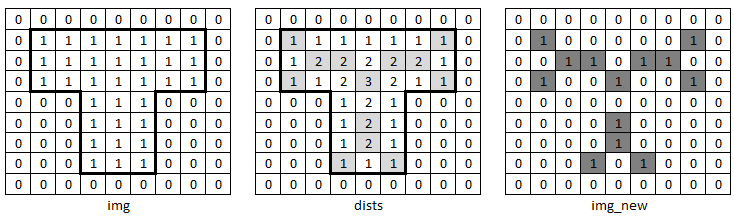

**Step 1: create the distances matrix**
```python
- Input: img: binary image
- dist = 0; dists = img.copy(); dist_changed = True
- while dist_changed:
   - dist = dist + 1
   - dist_changed = False
   - scan img
      - if img[r,c] == 0:
         - continue
      - if min(neighbours(r,c)) >= dist:
         - dists[r,c] = dist + 1
         - dist_changed = True
```

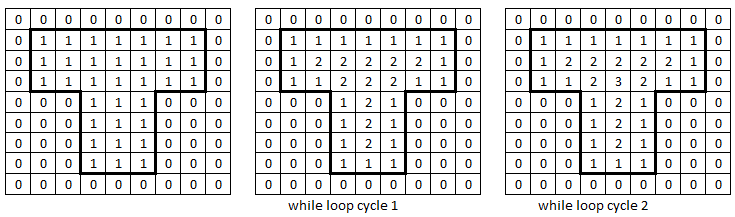

**Step2: mark the skeleton pixels**
1. create img_new, same size as dists with zeros
2. scan dists:
   - if (dists[r, c] > 0) and (dists[r,c] >= all its neighbours):
     - img_new[r,c] = 1

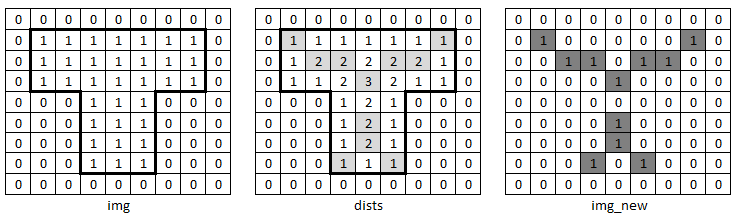

**Note**
- Possible non-continuity in the skeleton.
- Internal corners

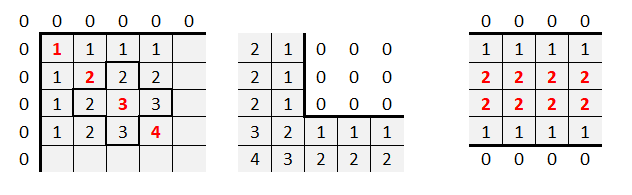

### Properites

Q: What type of object shapes are most suitable for representation with a skeleton?

Q: What is the skeleton of a circle?

Q: Does an object have a unique skeleton?

### Q: Does a skeleton represent a unique object?

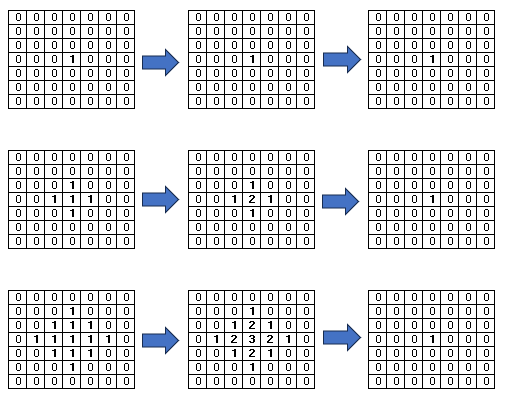

Q: What modification can transform it to be unique?


Q: what is the required modification so we can reproduce the object?

### Q: is the skeleton robust to modifications (in the object?)

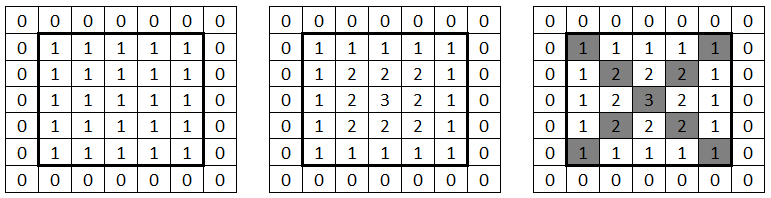

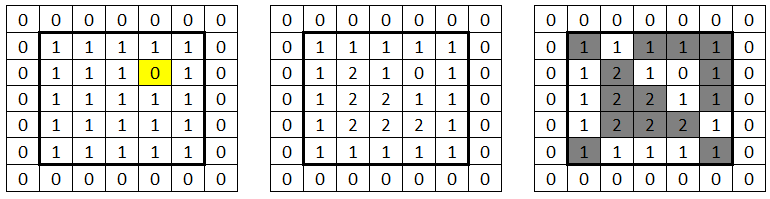

###More examples using built-in functions

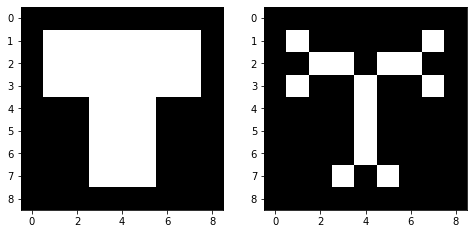

In [ ]:
img2 = np.array([[0,0,0,0,0,0,0,0,0],
                 [0,1,1,1,1,1,1,1,0],
                 [0,1,1,1,1,1,1,1,0],
                 [0,1,1,1,1,1,1,1,0],
                 [0,0,0,1,1,1,0,0,0],
                 [0,0,0,1,1,1,0,0,0],
                 [0,0,0,1,1,1,0,0,0],
                 [0,0,0,1,1,1,0,0,0],
                 [0,0,0,0,0,0,0,0,0],
                 ])

skeleton = medial_axis(img2)
plot_images(img2, skeleton)

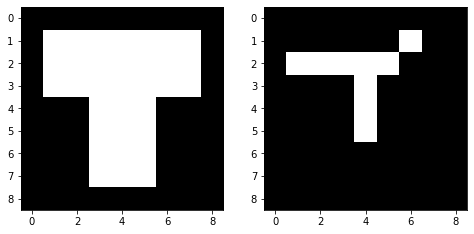

In [ ]:
skeleton = skeletonize(img2)
plot_images(img2, skeleton)